___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
#pip install transformers #Done

In [ ]:
#pip install scikit-plot #Done

In [ ]:
#!pip install -q tf-models-official #Done

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

#deep learning part
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.utils.class_weight import compute_class_weight

#for BERT part
import tensorflow as tf
import os
from transformers import BertTokenizer, AutoTokenizer
#from official.nlp import optimization
from transformers import TFBertModel, TFAutoModel
from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
from tensorflow.keras import Model
#from tensorflow.keras.losses import CategoricalCrossentropy
#from tensorflow.keras.metrics import Recall

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Wrangling

In [ ]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df.shape

(23486, 11)

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.duplicated().sum()

0

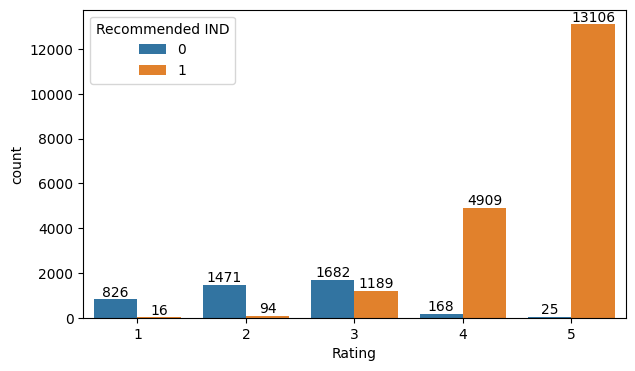

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
#fix the noise data, some people give the rate 1 and then recommend other to buy it which is not convienient, therefore i need to fix this problem
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

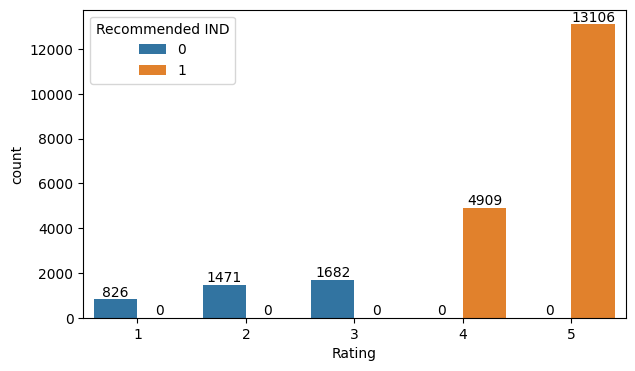

In [ ]:
#after fix the noise problem
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df['Recommended IND'].value_counts()
#we have imbalanced dataset

1    18015
0     3979
Name: Recommended IND, dtype: int64

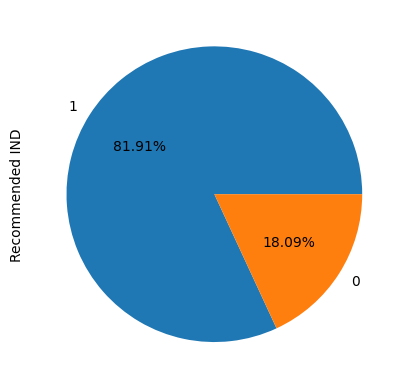

In [ ]:
df['Recommended IND'].value_counts().plot.pie(autopct = '%.2f%%');

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
temp = df.copy()

In [ ]:
temp.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3592
Review Text                 819
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#drop the missing values from Review Text column
temp = temp.dropna(axis=0,  how = 'all', subset=['Review Text'])

In [ ]:
#check that the dropping process has been done
temp.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2774
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

#### assumption that there is a relation between the length of the text and its class

In [ ]:
#to see if there is a relation between the length of the text and its class
temp['count'] = temp['Review Text'].apply(lambda x: len(x.split(' ')))

print("the min length: ",temp['count'].min())
print("the max length: ",temp['count'].max())

the min length:  2
the max length:  115


In [ ]:
temp['count']

0         8
1        67
2        98
3        22
4        36
         ..
23478    44
23479    97
23481    28
23483    42
23485    19
Name: count, Length: 21175, dtype: int64

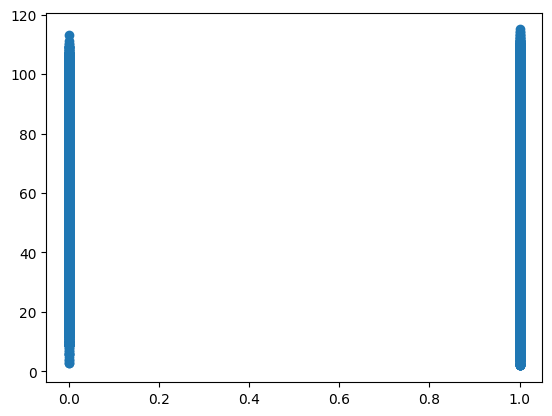

In [ ]:
plt.scatter(temp['Recommended IND'], temp['count'])
#as we can see there is no relationship between the length of the text and the target class

###

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
#we need "no" and "not" words in our text as they have a big impact on the text
stop_words = stopwords.words("english")

for i in ["not", "no"]:
        stop_words.remove(i)

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def cleaning(data):
    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #2. Tokenize
    text_tokens = word_tokenize(data.lower())

    #3. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #6. joining
    return " ".join( text_cleaned)

In [ ]:
#start cleaning
prep_df = temp.copy()
prep_df['clean_review'] = prep_df['Review Text'].apply(cleaning)

In [ ]:
#before cleaning
temp['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23478    I was surprised at the positive reviews for th...
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23483    This fit well, but the top was very see throug...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 21175, dtype: object

In [ ]:
#after cleaning
prep_df['clean_review']

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23478    surprised positive review product terrible cut...
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23483    fit well top see never would worked im glad ab...
23485    dress lovely platinum feminine fit perfectly e...
Name: clean_review, Length: 21175, dtype: object

In [ ]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21175 entries, 0 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               21175 non-null  int64 
 1   Clothing ID              21175 non-null  int64 
 2   Age                      21175 non-null  int64 
 3   Title                    18401 non-null  object
 4   Review Text              21175 non-null  object
 5   Rating                   21175 non-null  int64 
 6   Recommended IND          21175 non-null  int64 
 7   Positive Feedback Count  21175 non-null  int64 
 8   Division Name            21162 non-null  object
 9   Department Name          21162 non-null  object
 10  Class Name               21162 non-null  object
 11  count                    21175 non-null  int64 
 12  clean_review             21175 non-null  object
dtypes: int64(7), object(6)
memory usage: 2.3+ MB


In [ ]:
#select wanted columns
prep_df = prep_df[['clean_review', 'Recommended IND']]

In [ ]:
#rename the columns
prep_df.rename(columns={'Recommended IND': 'recommended'}, inplace=True)

In [ ]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21175 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   clean_review  21175 non-null  object
 1   recommended   21175 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 496.3+ KB


In [ ]:
#check duplicate values in the new dataframe
prep_df.duplicated().sum()

9

In [ ]:
#delete duplications
prep_df.drop_duplicates(inplace = True)

In [ ]:
prep_df.duplicated().sum()

0

---
---


### Missing Value Detection

In [ ]:
#check null values in the new dataframe
prep_df.isnull().sum()

clean_review    0
recommended     0
dtype: int64

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
#pip install wordcloud

In [ ]:
from wordcloud import WordCloud

### Collect Words (positive and negative separately)

In [ ]:
positive_words = prep_df.loc[prep_df['recommended'] == 1]

In [ ]:
positive_words

,clean_review,recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1
...,...,...
23476,bottom cute defiantly cheeky would recommend s...,1
23477,im impressed beautiful color combination embro...,1
23479,wasnt sure ordering skirt couldnt see person f...,1
23481,happy snag dress great price easy slip flatter...,1


In [ ]:
positives = " ".join(positive_words['clean_review'])

In [ ]:
negative_words = prep_df.loc[prep_df['recommended'] == 0]

In [ ]:
negative_words

,clean_review,recommended
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one not petite foot tal...,0
10,dress run small esp zipper area run ordered sp...,0
22,first not pullover styling side zipper wouldnt...,0
25,loved material didnt really look long dress pu...,0
...,...,...
23449,tried color really pretty fun donset want pair...,0
23450,wanted love jacket soft great color unfortunat...,0
23460,purchased good price typically love maeve fabr...,0
23478,surprised positive review product terrible cut...,0


In [ ]:
negatives = " ".join(negative_words['clean_review'])

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

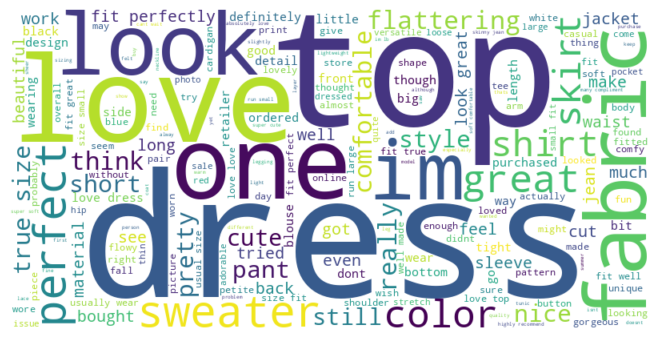

In [ ]:
plt.axis("off")
#making the wordCloud
wordcloud_p = WordCloud( background_color="white", width=800, height=400).generate(positives)
plt.tight_layout(pad=0)
#displaying wordCloud
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.show()

In [ ]:
#to fix 'ImageDraw' object has no attribute 'textbbox'
#python -m pip install Pillow==9.5.0

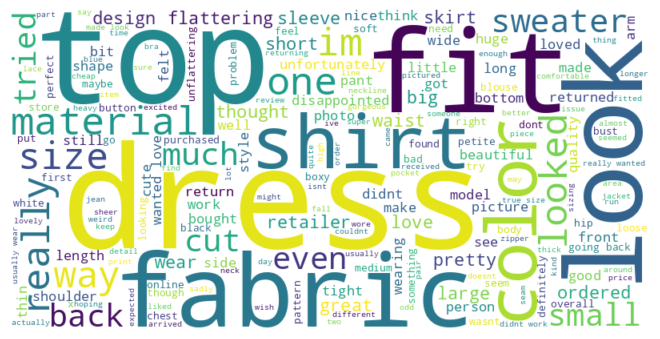

In [ ]:
plt.axis("off")
#making the wordCloud
wordcloud_n = WordCloud( background_color="white", width=800, height=400).generate(negatives)
plt.tight_layout(pad=0)
#displaying wordCloud
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
X = prep_df["clean_review"].values
y = prep_df["recommended"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
df_train_count_vic = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())
df_test_count_vic = pd.DataFrame(X_test_count.toarray(), columns = vectorizer.get_feature_names_out())

### TF-IDF

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

### Eval Function

In [ ]:
#confusion matrix
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("\tTest_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()
    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_train_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print()
    print(classification_report(y_train, y_train_pred))

In [ ]:
#roc curve
def roc_auc_plot(model, y_train, X_train, y_test, X_test):
    pred_train = model.predict(X_train).ravel()
    pred_test = model.predict(X_test).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [ ]:
#we want to focus on not recommended class
def eval_scores(model, X_train, y_train):
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average=None, labels=[0]),
               'recall': make_scorer(recall_score, average=None, labels = [0]),
               'f1': make_scorer(f1_score, average=None, labels = [0])}

    scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True, n_jobs = -1)
    # cv=5 -> will apply stratification by default
    # you should use n_job = -1 to speed up the process

    df_scores = pd.DataFrame(scores, index = range(1,6))
    return df_scores


## Logistic Regression

### CountVectorizer

In [ ]:
logisitc_model_count = LogisticRegression(max_iter = 10000, class_weight= "balanced")
logisitc_model_count.fit(X_train_count, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [ ]:
logistic_scores_count = eval_scores(logisitc_model_count, X_train_count, y_train)
logistic_scores_count.mean()[2:]

test_accuracy      0.893065
train_accuracy     0.952543
test_precision     0.675530
train_precision    0.806593
test_recall        0.812317
train_recall       0.977853
test_f1            0.737520
train_f1           0.883996
dtype: float64

	Test_Set



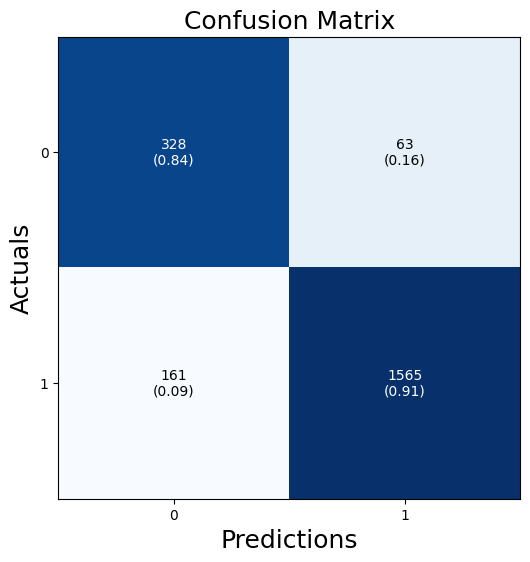

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       391
           1       0.96      0.91      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.82      0.87      0.84      2117
weighted avg       0.91      0.89      0.90      2117


	Train_Set



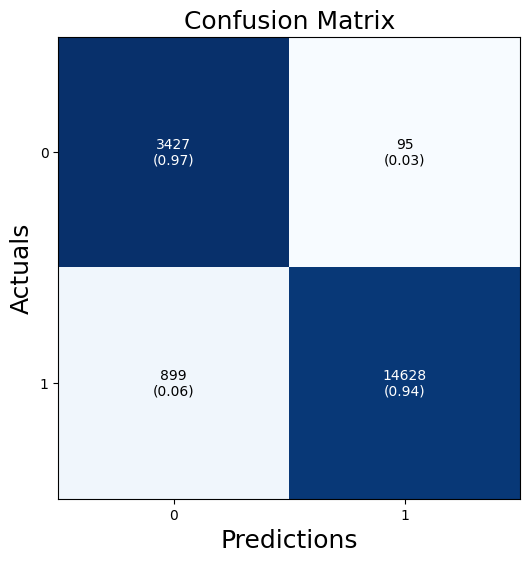


              precision    recall  f1-score   support

           0       0.79      0.97      0.87      3522
           1       0.99      0.94      0.97     15527

    accuracy                           0.95     19049
   macro avg       0.89      0.96      0.92     19049
weighted avg       0.96      0.95      0.95     19049



In [ ]:
eval_metric(logisitc_model_count, X_train_count, y_train, X_test_count, y_test)

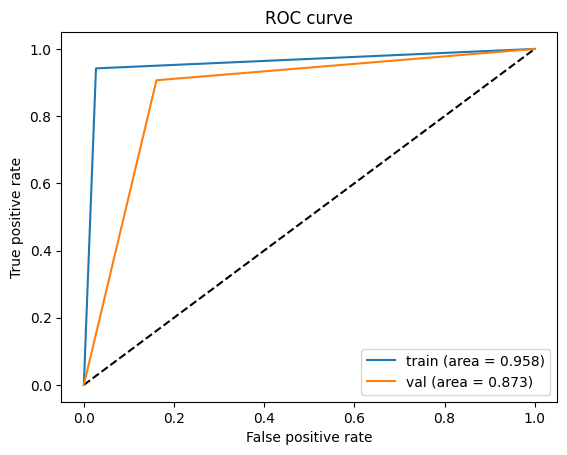

In [ ]:
roc_auc_plot(logisitc_model_count, y_train, X_train_count, y_test, X_test_count)

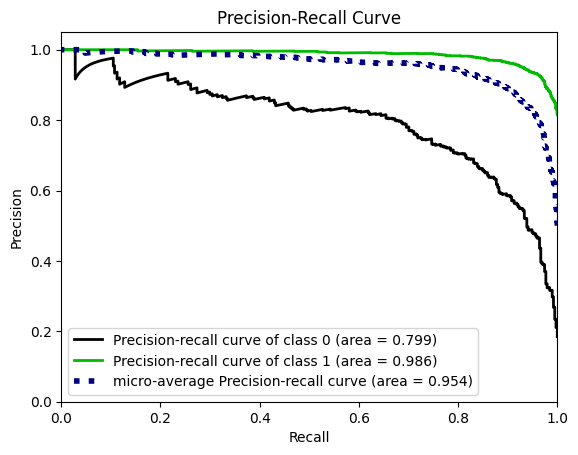

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = logisitc_model_count.predict_proba(X_test_count)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = logisitc_model_count.predict(X_test_count)
y_pred_proba = logisitc_model_count.predict_proba(X_test_count)[:,1]

log_count_per = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
logisitc_model_tf = LogisticRegression(max_iter = 10000, class_weight="balanced")
logisitc_model_tf.fit(X_train_tf_idf, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [ ]:
logistic_scores_tf_idf = eval_scores(logisitc_model_tf, X_train_tf_idf, y_train)
logistic_scores_tf_idf.mean()[2:]

test_accuracy      0.890231
train_accuracy     0.915166
test_precision     0.651793
train_precision    0.701185
test_recall        0.873080
train_recall       0.943072
test_f1            0.746338
train_f1           0.804334
dtype: float64

	Test_Set



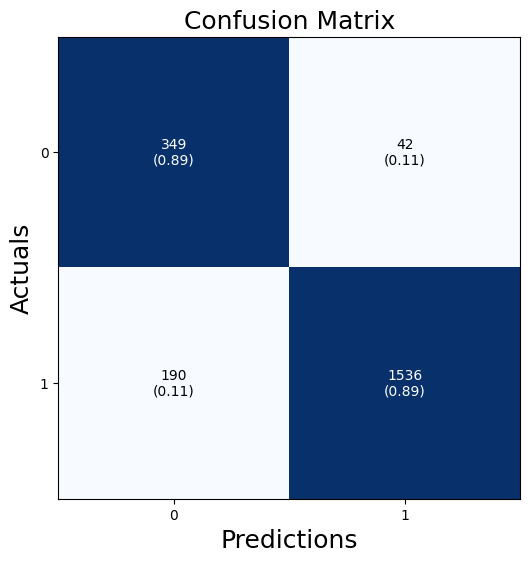

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       391
           1       0.97      0.89      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.81      0.89      0.84      2117
weighted avg       0.91      0.89      0.90      2117


	Train_Set



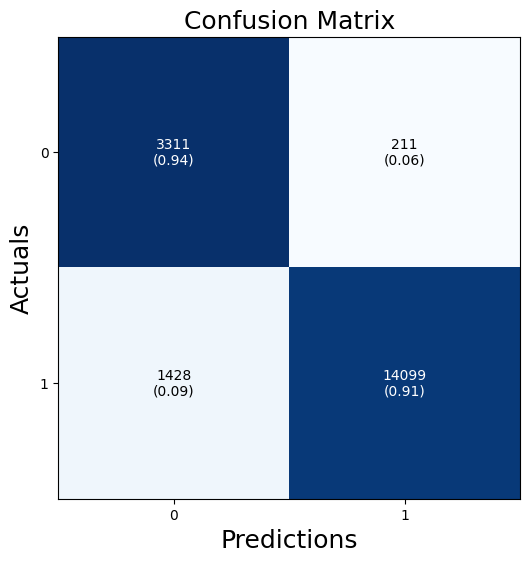


              precision    recall  f1-score   support

           0       0.70      0.94      0.80      3522
           1       0.99      0.91      0.95     15527

    accuracy                           0.91     19049
   macro avg       0.84      0.92      0.87     19049
weighted avg       0.93      0.91      0.92     19049



In [ ]:
eval_metric(logisitc_model_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
#roc_auc_plot(logisitc_model_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

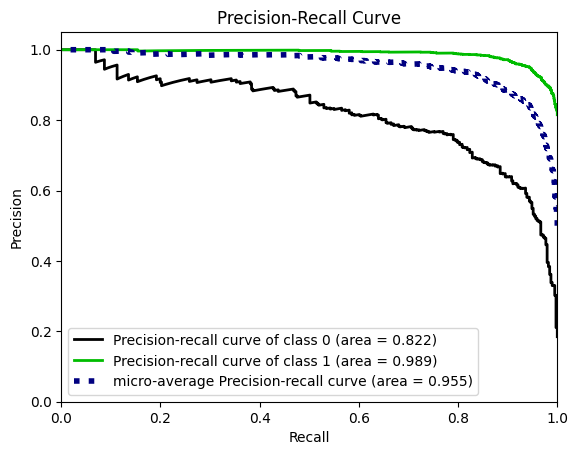

In [ ]:
y_pred_proba = logisitc_model_tf.predict_proba(X_test_tf_idf)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = logisitc_model_tf.predict(X_test_tf_idf)
y_pred_proba = logisitc_model_tf.predict_proba(X_test_tf_idf)[:,1]

log_tf_per = average_precision_score(y_test, y_pred_proba)
log_tf_rec = recall_score(y_test, y_pred)
log_tf_f1 = f1_score(y_test,y_pred)

### Gridsearch for Logistic Regression


In [ ]:
parameters_lr = [{'penalty':['l2', 'l1'],'C': [0.001, 0.1, 0.5],
                  'class_weight':['balanced', {0:3, 1:1}],
                  'solver':['liblinear', 'saga'],
                  'max_iter':[10000]}]

logistic_model_gs = LogisticRegression()
#f1_0 = make_scorer(f1_score, average=None, labels = [0])
recall_0 = make_scorer(recall_score, average=None, labels = [0])

#the model will take much time to perform the normal gridsearch, so we decided to to use HalvingGridSearchCV ineasted
grid_search_lr = HalvingGridSearchCV(logistic_model_gs,
                                     parameters_lr,
                                     max_resources=20,
                                     scoring = recall_0, #f1_0,
                                     cv = 5,
                                     n_jobs = -1,
                                     random_state=0)

#grid_search_lr = GridSearchCV(estimator = logistic_model_gs, param_grid = parameters_lr,
#                              scoring = f1_0, cv = 5, n_jobs = -1)

grid_search_lr.fit(X_train_tf_idf, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_
print("Best class 0 recall-score of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best class 0 recall-score of LR: 60.00 %
Best Parameter of LR: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
logistic_scores_gs = eval_scores(grid_search_lr, X_train_tf_idf, y_train)
logistic_scores_gs.mean()[2:]

test_accuracy      0.710700
train_accuracy     0.715351
test_precision     0.473931
train_precision    0.481864
test_recall        0.892364
train_recall       0.905314
test_f1            0.598190
train_f1           0.608019
dtype: float64

	Test_Set



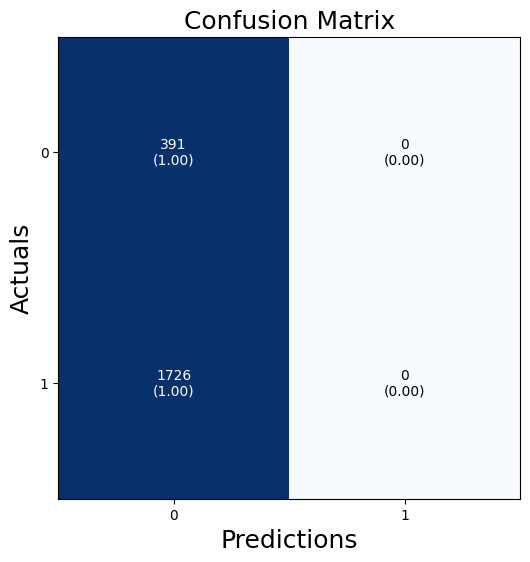

              precision    recall  f1-score   support

           0       0.18      1.00      0.31       391
           1       0.00      0.00      0.00      1726

    accuracy                           0.18      2117
   macro avg       0.09      0.50      0.16      2117
weighted avg       0.03      0.18      0.06      2117


	Train_Set



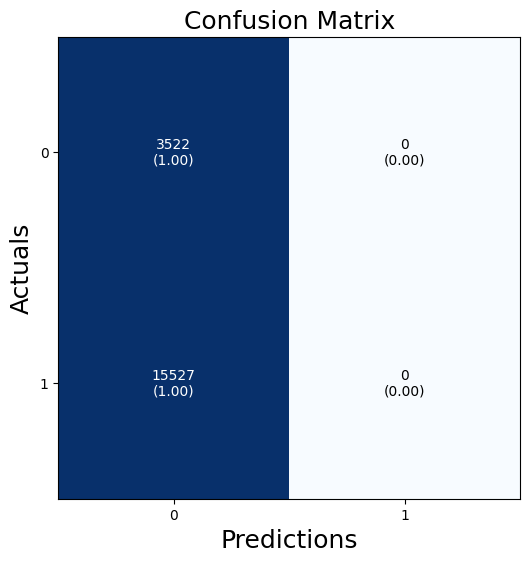


              precision    recall  f1-score   support

           0       0.18      1.00      0.31      3522
           1       0.00      0.00      0.00     15527

    accuracy                           0.18     19049
   macro avg       0.09      0.50      0.16     19049
weighted avg       0.03      0.18      0.06     19049



In [ ]:
eval_metric(grid_search_lr, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
#roc_auc_plot(grid_search_lr, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

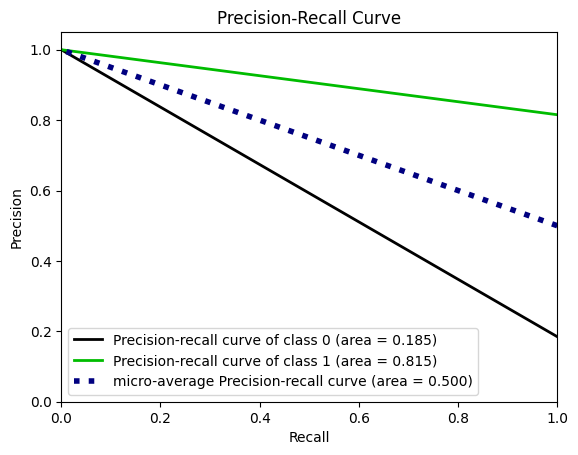

In [ ]:
y_pred_proba = grid_search_lr.predict_proba(X_test_tf_idf)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
'''y_pred = grid_search_lr.predict(X_test_tf_idf)
y_pred_proba = grid_search_lr.predict_proba(X_test_tf_idf)[:,1]

log_gs_per = average_precision_score(y_test, y_pred_proba)
log_gs_rec = recall_score(y_test, y_pred)
log_gs_f1 = f1_score(y_test,y_pred)'''

**the grid search of logistic regression model give worse results than the vanilla models, therefore we wont save its scores**

## Naive Bayes

### Countvectorizer

In [ ]:
nb_count = BernoulliNB()
nb_count.fit(X_train_count, y_train)

BernoulliNB()

In [ ]:
nb_scores_count = eval_scores(nb_count, X_train_count, y_train)
nb_scores_count.mean()[2:]

test_accuracy      0.897685
train_accuracy     0.917633
test_precision     0.705984
train_precision    0.754212
test_recall        0.765471
train_recall       0.822615
test_f1            0.734490
train_f1           0.786926
dtype: float64

	Test_Set



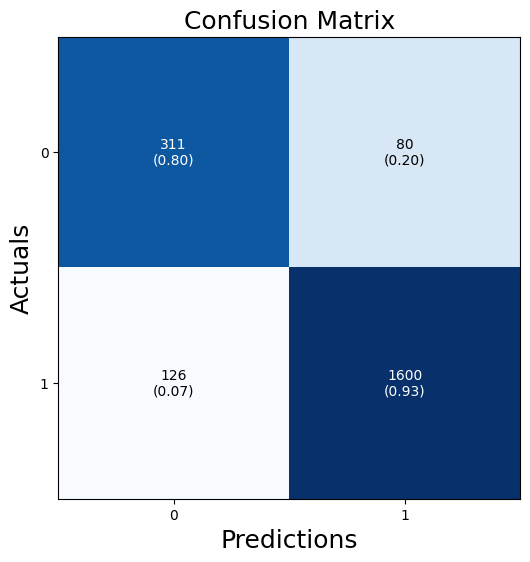

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       391
           1       0.95      0.93      0.94      1726

    accuracy                           0.90      2117
   macro avg       0.83      0.86      0.85      2117
weighted avg       0.91      0.90      0.90      2117


	Train_Set



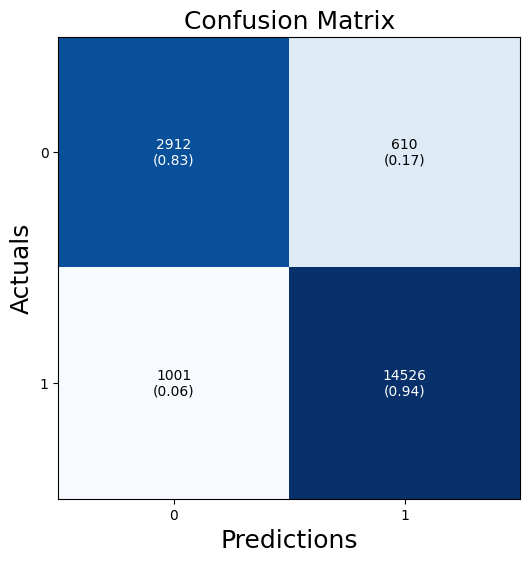


              precision    recall  f1-score   support

           0       0.74      0.83      0.78      3522
           1       0.96      0.94      0.95     15527

    accuracy                           0.92     19049
   macro avg       0.85      0.88      0.87     19049
weighted avg       0.92      0.92      0.92     19049



In [ ]:
eval_metric(nb_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
#roc_auc_plot(nb_count, y_train, X_train_count, y_test, X_test_count)

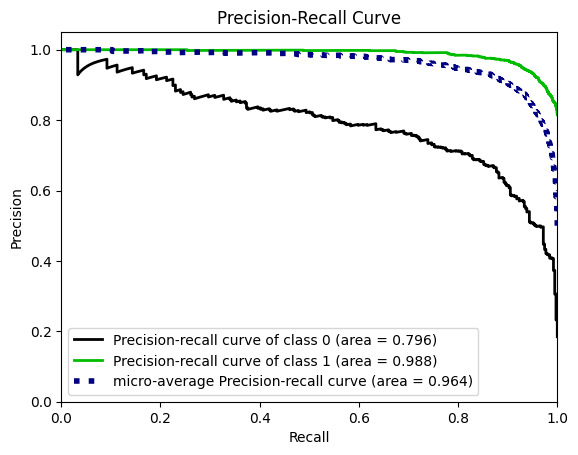

In [ ]:
y_pred_proba = nb_count.predict_proba(X_test_count)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb_count.predict(X_test_count)
y_pred_proba= nb_count.predict_proba(X_test_count)[:,1]

nb_count_pre = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
nb_tf = BernoulliNB()
nb_tf.fit(X_train_tf_idf, y_train)

BernoulliNB()

In [ ]:
nb_scores_tf = eval_scores(nb_tf, X_train_tf_idf, y_train)
nb_scores_tf.mean()[2:]

test_accuracy      0.897685
train_accuracy     0.917633
test_precision     0.705984
train_precision    0.754212
test_recall        0.765471
train_recall       0.822615
test_f1            0.734490
train_f1           0.786926
dtype: float64

	Test_Set



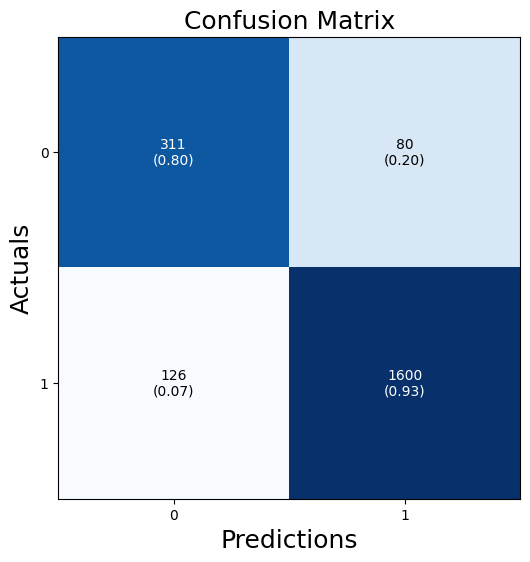

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       391
           1       0.95      0.93      0.94      1726

    accuracy                           0.90      2117
   macro avg       0.83      0.86      0.85      2117
weighted avg       0.91      0.90      0.90      2117


	Train_Set



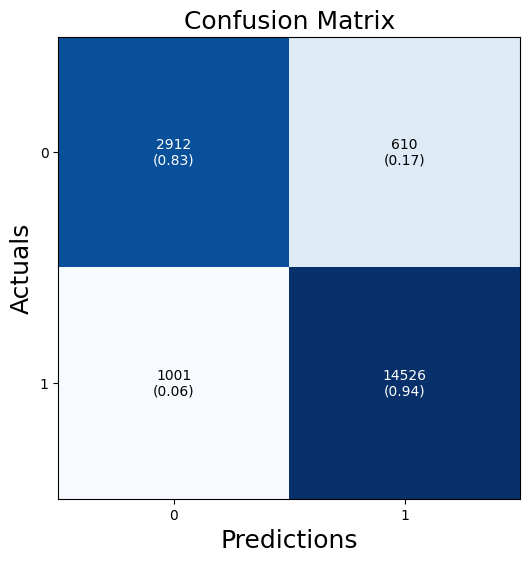


              precision    recall  f1-score   support

           0       0.74      0.83      0.78      3522
           1       0.96      0.94      0.95     15527

    accuracy                           0.92     19049
   macro avg       0.85      0.88      0.87     19049
weighted avg       0.92      0.92      0.92     19049



In [ ]:
eval_metric(nb_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
#roc_auc_plot(nb_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

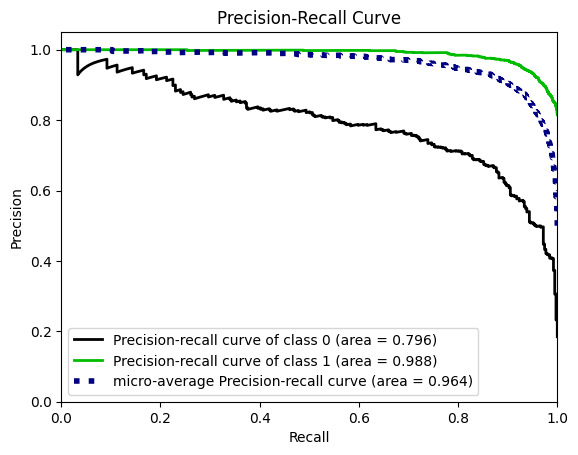

In [ ]:
y_pred_proba = nb_tf.predict_proba(X_test_tf_idf)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb_tf.predict(X_test_tf_idf)
y_pred_proba= nb_tf.predict_proba(X_test_tf_idf)[:,1]

nb_tf_pre = average_precision_score(y_test, y_pred_proba)
nb_tf_rec = recall_score(y_test, y_pred)
nb_tf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
#increasing the max_iter to help the model converge
svm_count = SVC(class_weight="balanced")
svm_count.fit(X_train_count, y_train)

SVC(class_weight='balanced')

In [ ]:
svm_scores_count = eval_scores(svm_count, X_train_count, y_train)
svm_scores_count.mean()[2:]

test_accuracy      0.903880
train_accuracy     0.973647
test_precision     0.726655
train_precision    0.881664
test_recall        0.770014
train_recall       0.990418
test_f1            0.747649
train_f1           0.932877
dtype: float64

	Test_Set



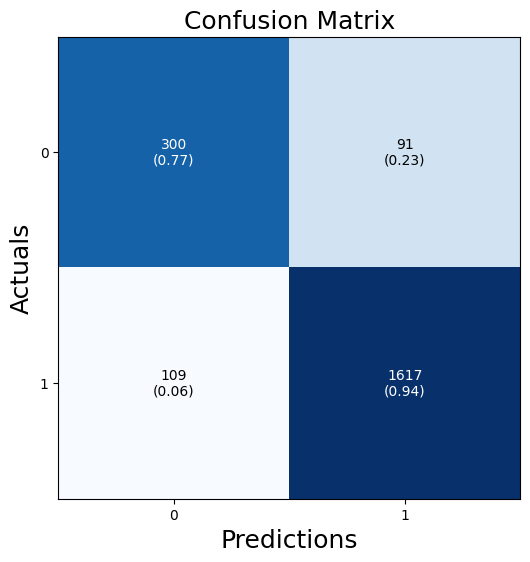

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       391
           1       0.95      0.94      0.94      1726

    accuracy                           0.91      2117
   macro avg       0.84      0.85      0.85      2117
weighted avg       0.91      0.91      0.91      2117


	Train_Set



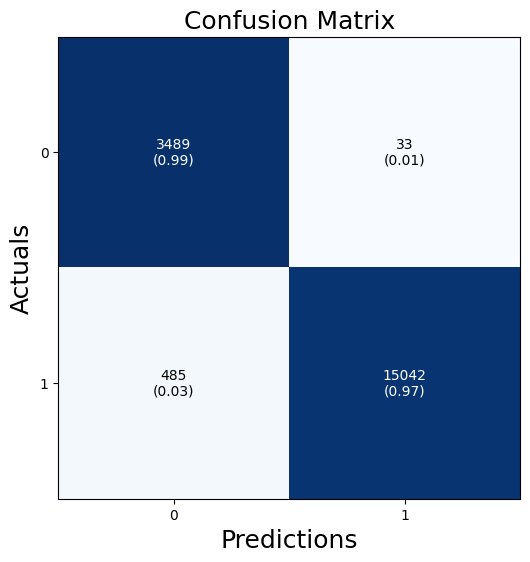


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3522
           1       1.00      0.97      0.98     15527

    accuracy                           0.97     19049
   macro avg       0.94      0.98      0.96     19049
weighted avg       0.98      0.97      0.97     19049



In [ ]:
eval_metric(svm_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
#roc_auc_plot(svm_count, y_train, X_train_count, y_test, X_test_count)

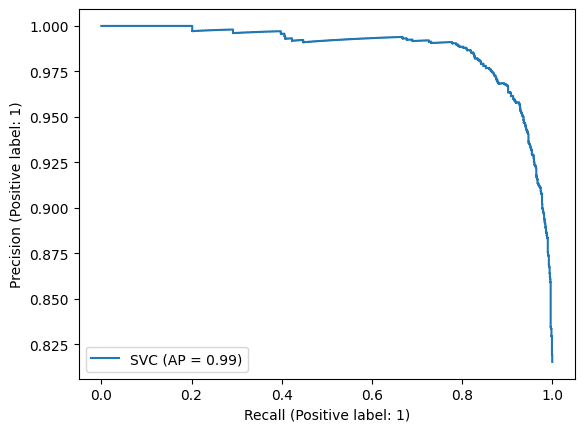

In [ ]:
PrecisionRecallDisplay.from_estimator(svm_count,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = svm_count.predict(X_test_count)
decision_function= svm_count.decision_function(X_test_count)

svm_count_pre = average_precision_score(y_test, decision_function)
svm_count_rec = recall_score(y_test, y_pred)
svm_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [ ]:
svm_tf = SVC(class_weight="balanced")
svm_tf.fit(X_train_tf_idf, y_train)

SVC(class_weight='balanced')

In [ ]:
svm_scores_tf = eval_scores(svm_tf, X_train_tf_idf, y_train)
svm_scores_tf.mean()[2:]

test_accuracy      0.912489
train_accuracy     0.984448
test_precision     0.755222
train_precision    0.923188
test_recall        0.779385
train_recall       0.999006
test_f1            0.767084
train_f1           0.959602
dtype: float64

	Test_Set



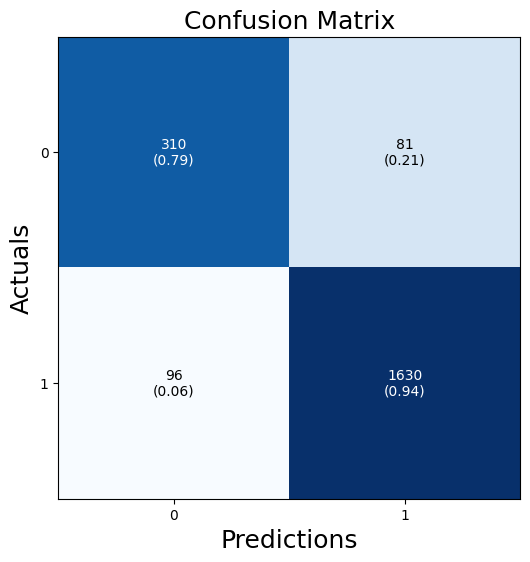

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       391
           1       0.95      0.94      0.95      1726

    accuracy                           0.92      2117
   macro avg       0.86      0.87      0.86      2117
weighted avg       0.92      0.92      0.92      2117


	Train_Set



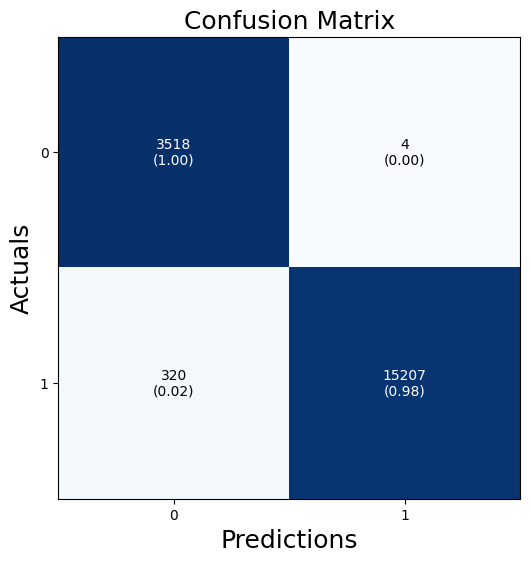


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3522
           1       1.00      0.98      0.99     15527

    accuracy                           0.98     19049
   macro avg       0.96      0.99      0.97     19049
weighted avg       0.98      0.98      0.98     19049



In [ ]:
eval_metric(svm_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
#roc_auc_plot(svm_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

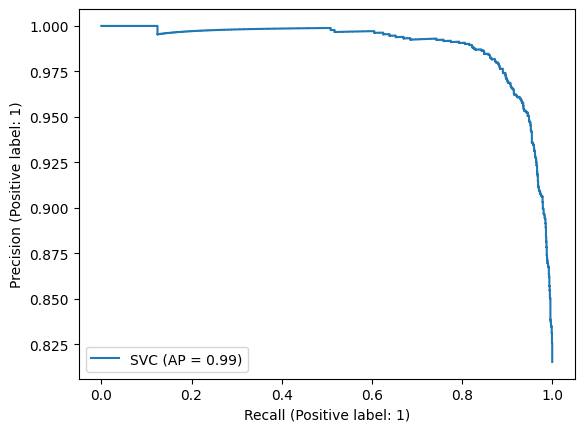

In [ ]:
PrecisionRecallDisplay.from_estimator(svm_tf,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = svm_tf.predict(X_test_tf_idf)
decision_function= svm_tf.decision_function(X_test_tf_idf)

svm_tf_pre = average_precision_score(y_test, decision_function)
svm_tf_rec = recall_score(y_test, y_pred)
svm_tf_f1 = f1_score(y_test,y_pred)

### Gridsearch for SVM

In [ ]:
svm_tf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
param_grid_svc = {'C': [0.01, 0.1, 1, ],
                  'gamma': ["scale", "auto"],
                  'kernel': ['rbf', 'linear', "sigmoid"],
                  'class_weight': ["balanced", {0:3, 1:1}],
                  'max_iter':[100000]}

svm_tf_gs = SVC()
#f1_0 = make_scorer(f1_score, average=None, labels = [0])
recall_0 = make_scorer(recall_score, average=None, labels = [0])

grid_search_svc = HalvingGridSearchCV(svm_tf_gs,
                                     param_grid_svc,
                                     max_resources=20,
                                     scoring =  recall_0,
                                     cv = 5,
                                     n_jobs = -1,
                                     random_state=0)

grid_search_svc.fit(X_train_tf_idf, y_train)
best_accuracy_svc = grid_search_svc.best_score_
best_paramaeter_svc = grid_search_svc.best_params_
print("Best class 0 recall-score of svc: {:.2f} %".format(best_accuracy_svc.mean()*100))
print("Best Parameter of svc:", best_paramaeter_svc)

Best class 0 recall-score of svc: 0.00 %
Best Parameter of svc: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 100000}


In [ ]:
svm_scores_grid = eval_scores(grid_search_svc, X_train_tf_idf, y_train)
svm_scores_grid.mean()[2:]

test_accuracy      0.583140
train_accuracy     0.589477
test_precision     0.180516
train_precision    0.190568
test_recall        0.571875
train_recall       0.583747
test_f1            0.258687
train_f1           0.269874
dtype: float64

	Test_Set



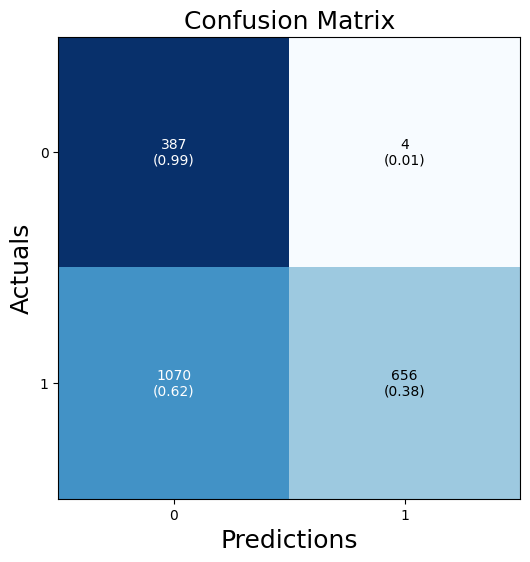

              precision    recall  f1-score   support

           0       0.27      0.99      0.42       391
           1       0.99      0.38      0.55      1726

    accuracy                           0.49      2117
   macro avg       0.63      0.68      0.48      2117
weighted avg       0.86      0.49      0.53      2117


	Train_Set



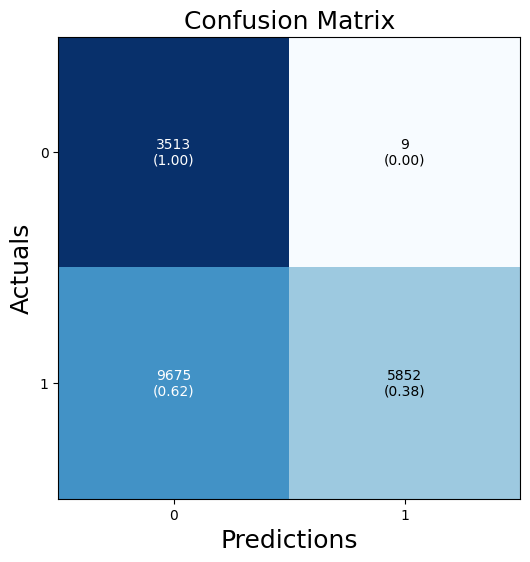


              precision    recall  f1-score   support

           0       0.27      1.00      0.42      3522
           1       1.00      0.38      0.55     15527

    accuracy                           0.49     19049
   macro avg       0.63      0.69      0.48     19049
weighted avg       0.86      0.49      0.52     19049



In [ ]:
eval_metric(grid_search_svc, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
#roc_auc_plot(grid_search_svc, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

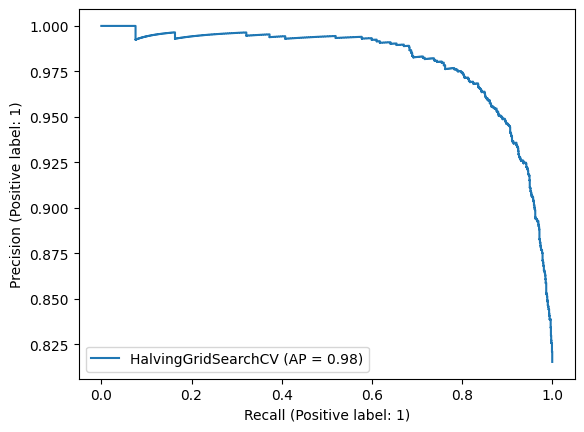

In [ ]:
PrecisionRecallDisplay.from_estimator(grid_search_svc,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
'''y_pred = grid_search_svc.predict(X_test_tf_idf)
decision_function= grid_search_svc.decision_function(X_test_tf_idf)

svm_gs_pre = average_precision_score(y_test, decision_function)
svm_gs_rec = recall_score(y_test, y_pred)
svm_gs_f1 = f1_score(y_test,y_pred)'''

'y_pred = grid_search_svc.predict(X_test_tf_idf)\ndecision_function= grid_search_svc.decision_function(X_test_tf_idf)\n\nsvm_gs_pre = average_precision_score(y_test, decision_function)\nsvm_gs_rec = recall_score(y_test, y_pred)\nsvm_gs_f1 = f1_score(y_test,y_pred)'

**the grid search of SVC model give worse results than the vanilla models, therefore we wont save its scores**

## Random Forest

### Countvectorizer

In [ ]:
rf_count = RandomForestClassifier(100,
                                max_depth = 10,
                                random_state = 42,
                                n_jobs = -1,
                                class_weight="balanced")
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_scores_count = eval_scores(rf_count, X_train_count, y_train)
rf_scores_count.mean()[2:]

test_accuracy      0.865295
train_accuracy     0.895086
test_precision     0.600085
train_precision    0.661672
test_recall        0.814307
train_recall       0.885222
test_f1            0.690929
train_f1           0.757286
dtype: float64

	Test_Set



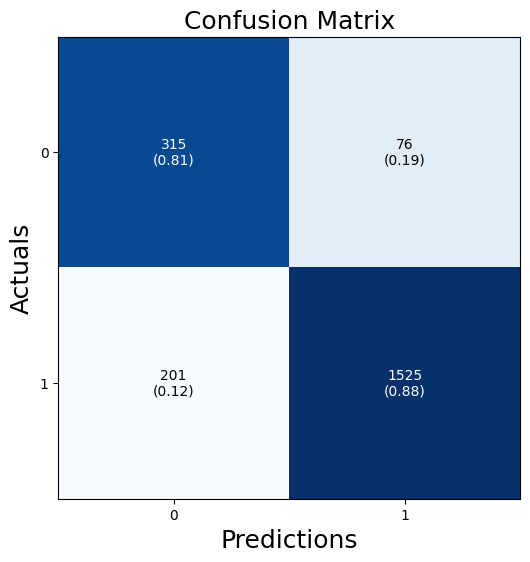

              precision    recall  f1-score   support

           0       0.61      0.81      0.69       391
           1       0.95      0.88      0.92      1726

    accuracy                           0.87      2117
   macro avg       0.78      0.84      0.81      2117
weighted avg       0.89      0.87      0.88      2117


	Train_Set



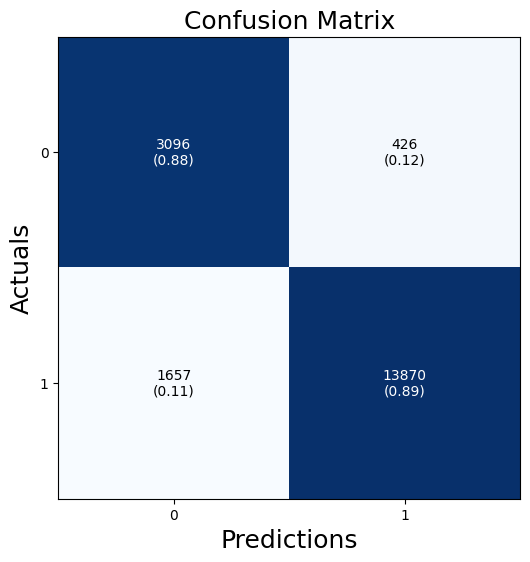


              precision    recall  f1-score   support

           0       0.65      0.88      0.75      3522
           1       0.97      0.89      0.93     15527

    accuracy                           0.89     19049
   macro avg       0.81      0.89      0.84     19049
weighted avg       0.91      0.89      0.90     19049



In [ ]:
eval_metric(rf_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
#roc_auc_plot(rf_count, y_train, X_train_count, y_test, X_test_count)

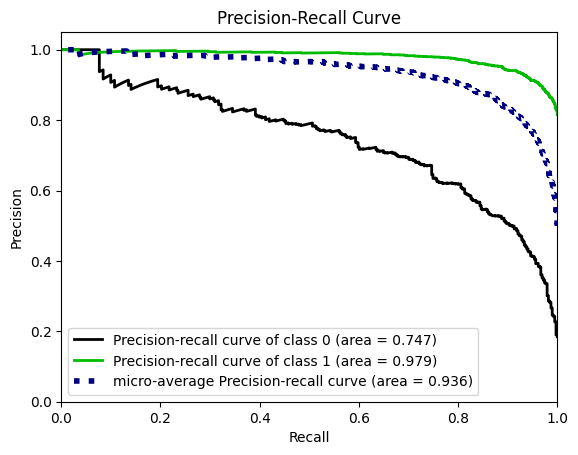

In [ ]:
y_pred_proba = rf_count.predict_proba(X_test_count)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf_count.predict(X_test_count)
y_pred_proba= rf_count.predict_proba(X_test_count)[:,1]

rf_count_pre = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
rf_tf = RandomForestClassifier(100,
                                max_depth = 10,
                                random_state = 42,
                                n_jobs = -1,
                                class_weight="balanced")
rf_tf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_scores_tf = eval_scores(rf_tf, X_train_tf_idf, y_train)
rf_scores_tf.mean()[2:]

test_accuracy      0.856423
train_accuracy     0.892435
test_precision     0.580028
train_precision    0.650754
test_recall        0.811186
train_recall       0.903108
test_f1            0.676341
train_f1           0.756380
dtype: float64

	Test_Set



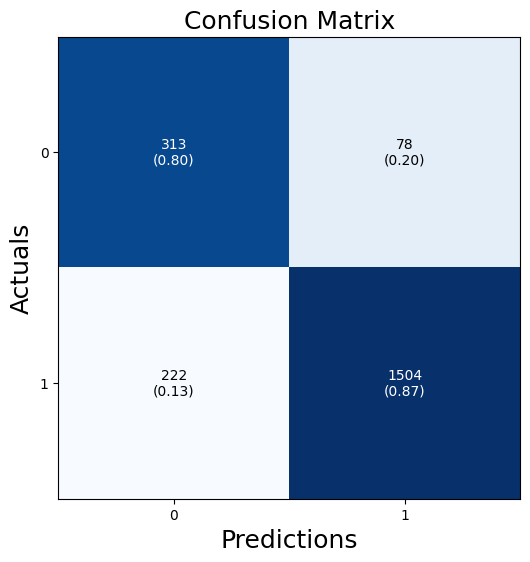

              precision    recall  f1-score   support

           0       0.59      0.80      0.68       391
           1       0.95      0.87      0.91      1726

    accuracy                           0.86      2117
   macro avg       0.77      0.84      0.79      2117
weighted avg       0.88      0.86      0.87      2117


	Train_Set



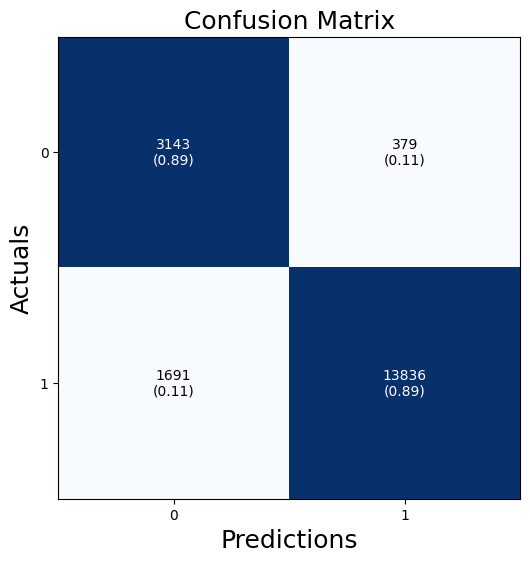


              precision    recall  f1-score   support

           0       0.65      0.89      0.75      3522
           1       0.97      0.89      0.93     15527

    accuracy                           0.89     19049
   macro avg       0.81      0.89      0.84     19049
weighted avg       0.91      0.89      0.90     19049



In [ ]:
eval_metric(rf_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
#roc_auc_plot(rf_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

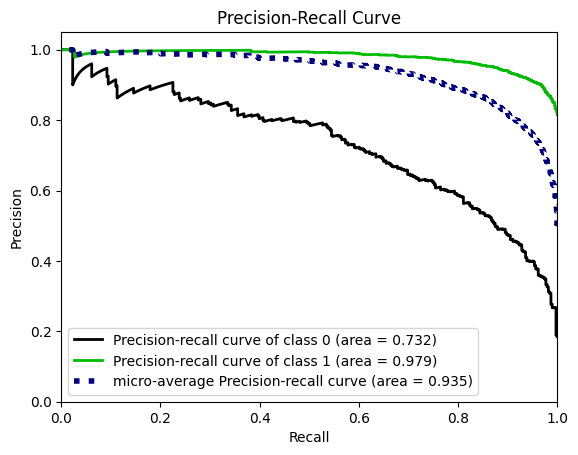

In [ ]:
y_pred_proba = rf_tf.predict_proba(X_test_tf_idf)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf_tf.predict(X_test_tf_idf)
y_pred_proba= rf_tf.predict_proba(X_test_tf_idf)[:,1]

rf_tf_pre = average_precision_score(y_test, y_pred_proba)
rf_tf_rec = recall_score(y_test, y_pred)
rf_tf_f1 = f1_score(y_test,y_pred)

### Gridsearch for Random Forest

In [ ]:
rf_count.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid_rf = {'n_estimators':[100, 200],
                 'max_features':[2, 'sqrt'],
                 'max_depth':[3, 4],
                 'class_weight': ["balanced", {0:3, 1:1}]}


rf_tf_gs = RandomForestClassifier()
#f1_0 = make_scorer(f1_score, average=None, labels = [0])
recall_0 = make_scorer(recall_score, average=None, labels = [0])

grid_search_rf = HalvingGridSearchCV(rf_tf_gs,
                                     param_grid_rf,
                                     max_resources=20,
                                     scoring = recall_0, #f1_0,
                                     cv = 5,
                                     n_jobs = -1,
                                     random_state=0)

grid_search_rf.fit(X_train_tf_idf, y_train)
best_accuracy_rf = grid_search_rf.best_score_
best_paramaeter_rf = grid_search_rf.best_params_
print("Best class 0 recall-score of RF: {:.2f} %".format(best_accuracy_rf.mean()*100))
print("Best Parameter of RF:", best_paramaeter_rf)

Best class 0 recall-score of RF: 0.00 %
Best Parameter of RF: {'class_weight': 'balanced', 'max_depth': 3, 'max_features': 2, 'n_estimators': 100}


In [ ]:
rf_scores_grid = eval_scores(grid_search_rf, X_train_tf_idf, y_train)
rf_scores_grid.mean()[2:]

test_accuracy      0.750171
train_accuracy     0.771681
test_precision     0.374587
train_precision    0.421233
test_recall        0.504578
train_recall       0.567923
test_f1            0.424508
train_f1           0.477751
dtype: float64

	Test_Set



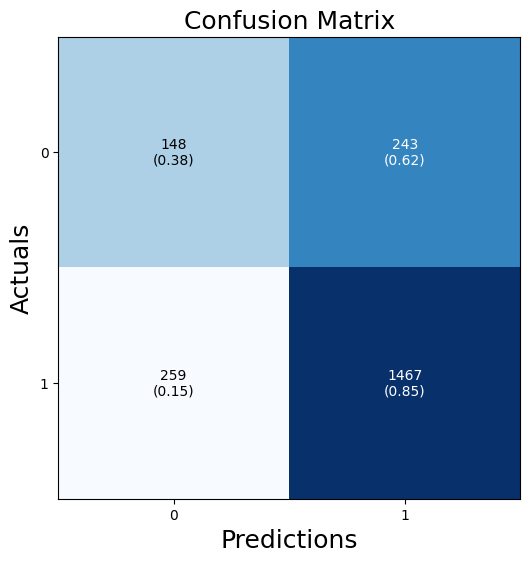

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       391
           1       0.86      0.85      0.85      1726

    accuracy                           0.76      2117
   macro avg       0.61      0.61      0.61      2117
weighted avg       0.77      0.76      0.76      2117


	Train_Set



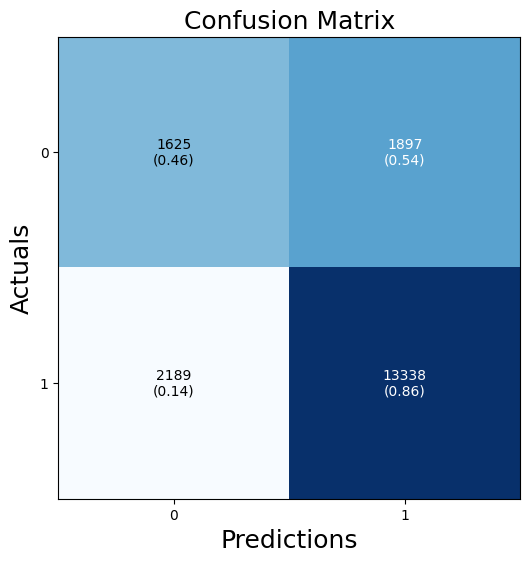


              precision    recall  f1-score   support

           0       0.43      0.46      0.44      3522
           1       0.88      0.86      0.87     15527

    accuracy                           0.79     19049
   macro avg       0.65      0.66      0.66     19049
weighted avg       0.79      0.79      0.79     19049



In [ ]:
eval_metric(grid_search_rf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
#roc_auc_plot(grid_search_rf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

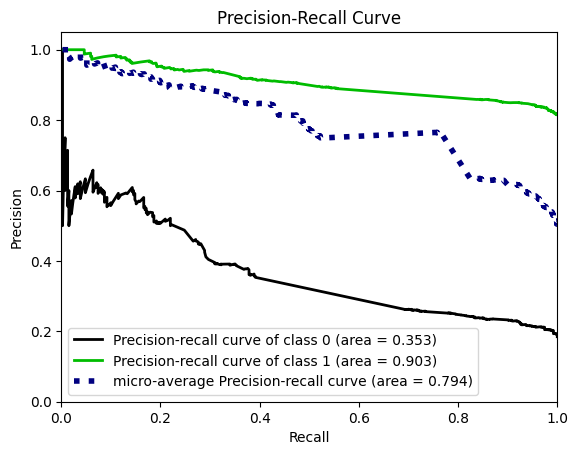

In [ ]:
y_pred_proba = grid_search_rf.predict_proba(X_test_tf_idf)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
'''y_pred = grid_search_rf.predict(X_test_tf_idf)
y_pred_proba= grid_search_rf.predict_proba(X_test_tf_idf)[:,1]

rf_gs_pre = average_precision_score(y_test, y_pred_proba)
rf_gs_rec = recall_score(y_test, y_pred)
rf_gs_f1 = f1_score(y_test,y_pred)'''

'y_pred = grid_search_rf.predict(X_test_tf_idf)\ny_pred_proba= grid_search_rf.predict_proba(X_test_tf_idf)[:,1]\n\nrf_gs_pre = average_precision_score(y_test, y_pred_proba)\nrf_gs_rec = recall_score(y_test, y_pred)\nrf_gs_f1 = f1_score(y_test,y_pred)'

**the grid search of RandomForest model give worse results than the vanilla models, therefore we wont save its scores**

## Ada Boosting

### Countvectorizer

In [ ]:
ada_count = AdaBoostClassifier(n_estimators= 200, random_state = 42)
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [ ]:
ada_scores_count = eval_scores(ada_count, X_train_count, y_train)
ada_scores_count.mean()[2:]

test_accuracy      0.894588
train_accuracy     0.907685
test_precision     0.757948
train_precision    0.801428
test_recall        0.631744
train_recall       0.665673
test_f1            0.688966
train_f1           0.727252
dtype: float64

	Test_Set



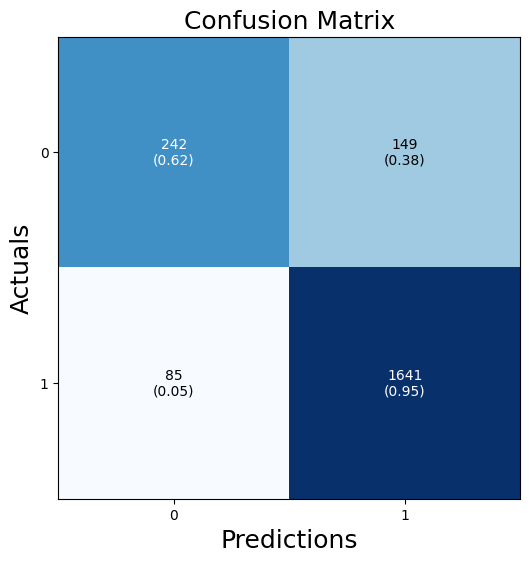

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       391
           1       0.92      0.95      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.83      0.78      0.80      2117
weighted avg       0.88      0.89      0.89      2117


	Train_Set



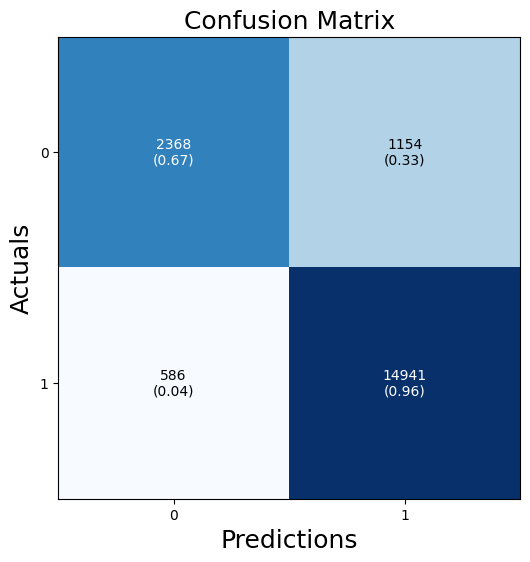


              precision    recall  f1-score   support

           0       0.80      0.67      0.73      3522
           1       0.93      0.96      0.94     15527

    accuracy                           0.91     19049
   macro avg       0.86      0.82      0.84     19049
weighted avg       0.90      0.91      0.91     19049



In [ ]:
eval_metric(ada_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
#roc_auc_plot(ada_count, y_train, X_train_count, y_test, X_test_count)

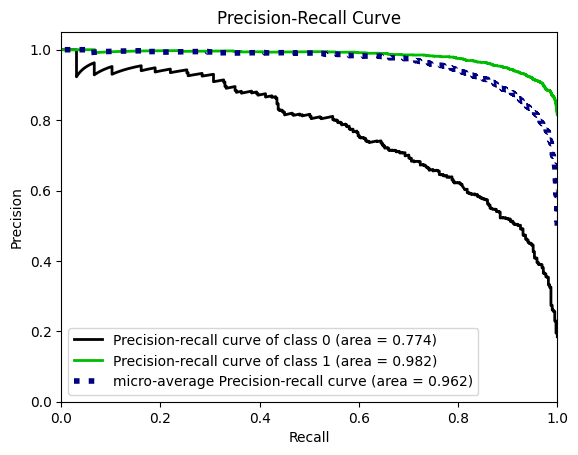

In [ ]:
y_pred_proba = ada_count.predict_proba(X_test_count)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada_count.predict(X_test_count)
y_pred_proba= ada_count.predict_proba(X_test_count)[:,1]

ada_count_pre = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
ada_tf = AdaBoostClassifier(n_estimators= 200, random_state = 42)
ada_tf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [ ]:
ada_scores_tf = eval_scores(ada_tf, X_train_tf_idf, y_train)
ada_scores_tf.mean()[2:]

test_accuracy      0.892331
train_accuracy     0.914169
test_precision     0.748149
train_precision    0.813768
test_recall        0.629476
train_recall       0.694775
test_f1            0.683626
train_f1           0.749568
dtype: float64

	Test_Set



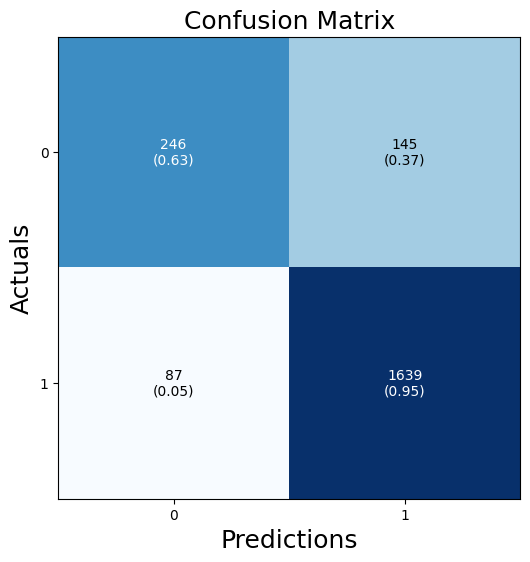

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       391
           1       0.92      0.95      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.83      0.79      0.81      2117
weighted avg       0.89      0.89      0.89      2117


	Train_Set



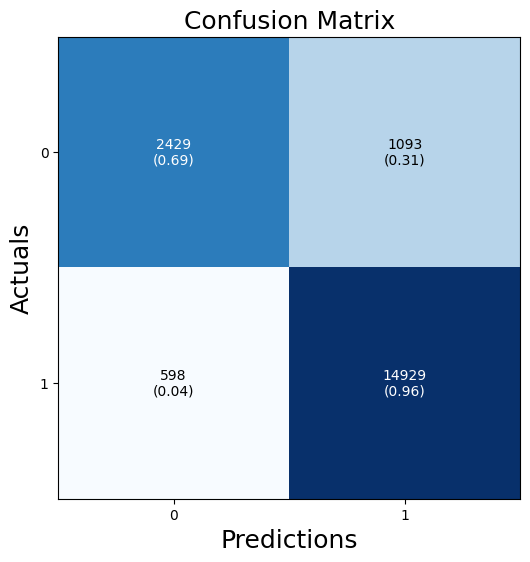


              precision    recall  f1-score   support

           0       0.80      0.69      0.74      3522
           1       0.93      0.96      0.95     15527

    accuracy                           0.91     19049
   macro avg       0.87      0.83      0.84     19049
weighted avg       0.91      0.91      0.91     19049



In [ ]:
eval_metric(ada_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
#roc_auc_plot(ada_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

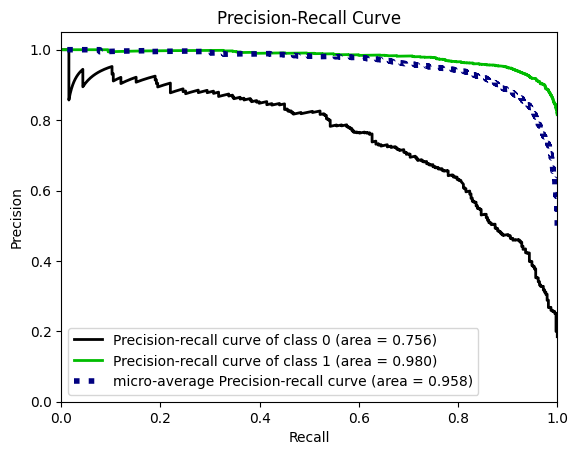

In [ ]:
y_pred_proba = ada_tf.predict_proba(X_test_tf_idf)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada_tf.predict(X_test_tf_idf)
y_pred_proba= ada_tf.predict_proba(X_test_tf_idf)[:,1]

ada_tf_pre = average_precision_score(y_test, y_pred_proba)
ada_tf_rec = recall_score(y_test, y_pred)
ada_tf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [ ]:
X = prep_df["clean_review"].values
y = prep_df["recommended"].values

In [ ]:
X # i used the cleaned dataset for less computational cost

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'happy snag dress great price easy slip flattering cut color combo',
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'dress lovely platinum feminine fit perfectly easy wear comfy highly recommend'],
      dtype=object)

In [ ]:
y

array([1, 1, 0, ..., 1, 0, 1])

### Tokenization

In [ ]:
num_words = 15001 # we add 1. #how many words do you want to keep (it will keep num_words-1 that's why we added 1)

tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'color': 7,
 'like': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'perfect': 16,
 'really': 17,
 'little': 18,
 'ordered': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'comfortable': 24,
 'back': 25,
 'bought': 26,
 'nice': 27,
 'cute': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'shirt': 32,
 'sweater': 33,
 'large': 34,
 'jean': 35,
 'much': 36,
 'length': 37,
 'run': 38,
 'also': 39,
 'work': 40,
 'got': 41,
 'petite': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'skirt': 46,
 'quality': 47,
 'medium': 48,
 'retailer': 49,
 'think': 50,
 'even': 51,
 'pretty': 52,
 'make': 53,
 'feel': 54,
 'x': 55,
 'pant': 56,
 'store': 57,
 'tried': 58,
 'usually': 59,
 'get': 60,
 'sleeve': 61,
 'way': 62,
 'good': 63,
 'go': 64,
 'could': 65,
 'cut': 66,
 'dont': 67,
 'big': 68,
 'black': 69,
 'made': 70,
 'still': 71,
 'right': 72,
 'true': 73,
 '

In [ ]:
len(tokenizer.word_index)

11647

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X[:1]

array(['absolutely wonderful silky sexy comfortable'], dtype=object)

In [ ]:
X_num_tokens[:1]
#it will replace the token with its respective rank

[[173, 394, 728, 493, 24]]

### Maximum number of tokens for all documents¶

In [ ]:
#we need to fix the number of tokens that we want to give to our model
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens] #compute how many tokens we have
num_tokens = np.array(num_tokens) #save the number of token in each row in an array
num_tokens

array([ 5, 30, 48, ..., 11, 19, 11])

In [ ]:
print("the mean value of tokens: ", num_tokens.mean())
print("the min value of tokens: ", num_tokens.min())
print("the max value of tokens: ", num_tokens.max())

the mean value of tokens:  28.69044694321081
the min value of tokens:  1
the max value of tokens:  59


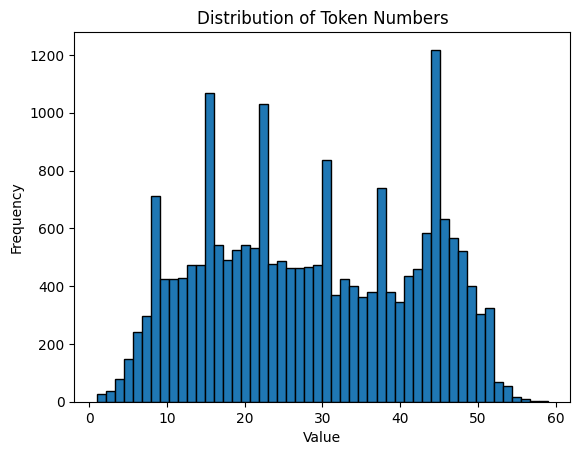

In [ ]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=50, edgecolor='black')
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
max_tokens = 50

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)
#it gave us 97% which indecate good number of chosen tokens

0.9773693659642824

In [ ]:
sum(num_tokens <= max_tokens)

20687

In [ ]:
len(num_tokens)

21166

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [ ]:
X_pad.shape

(21166, 50)

In [ ]:
print(type(X_num_tokens))
print(type(X_pad))

<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
#check the result of padding
print("the sentince before: ", X_num_tokens[801]) #this is the original sentince
print("the length before: ",len(X_num_tokens[801]))
print("the sentince after: ",X_pad[801])
print("the length after: ",len(X_pad[801]))

the sentince before:  [26, 6, 165, 4, 15, 12, 45, 173, 5, 120, 188, 274, 28]
the length before:  13
the sentince after:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  26   6 165   4  15  12  45 173   5 120 188 274  28]
the length after:  50


In [ ]:
np.argmax(num_tokens)
# The longest document in the corpus is located at the 11955th index.

11187

In [ ]:
#to see the effect of the padding
print("the sentince before: ", X_num_tokens[11955])
print("the sentince after: ",X_pad[11955])

the sentince before:  [2, 73, 4, 23, 166, 219, 63, 37, 12, 16]
the sentince after:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   2  73   4  23 166 219  63  37  12  16]


### Train Set Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y,
                                                    stratify=y,
                                                    test_size=0.10,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.10,
                                                  random_state = 42,
                                                  stratify = y_train)

In [ ]:
print("training shape: ", X_train.shape)
print("testing shape: ", X_test.shape)

training shape:  (17144, 50)
testing shape:  (2117, 50)


### Modeling

In [ ]:
from keras import regularizers

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
#recall_0 = make_scorer(recall_score, average=None, labels = [0])

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.3))

model.add(GRU(units=50, return_sequences=True))#the number of units here must have the same size as embedding_size
model.add(Dropout(0.3))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.3))

model.add(GRU(units=12, return_sequences=False))# if it will be the last layer of GRU then we must use return_sequences=False
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))# sigmoid because it is a binary classification

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 5, restore_best_weights=True)

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 2.7041009463722396, 1: 0.6134249320166023}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            750050    
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 gru (GRU)                   (None, 50, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 50, 25)            5775      
                                                                 
 dropout_2 (Dropout)         (None, 50, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=20,
    class_weight=class_weights,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/20
268/268 [==============================] - 47s 144ms/step - loss: 0.4245 - recall: 0.7460 - val_loss: 0.2590 - val_recall: 0.9092
Epoch 2/20
268/268 [==============================] - 38s 141ms/step - loss: 0.2563 - recall: 0.8899 - val_loss: 0.3421 - val_recall: 0.8467
Epoch 3/20
268/268 [==============================] - 34s 127ms/step - loss: 0.1996 - recall: 0.9149 - val_loss: 0.2683 - val_recall: 0.9015
Epoch 4/20
268/268 [==============================] - 39s 146ms/step - loss: 0.1693 - recall: 0.9307 - val_loss: 0.2560 - val_recall: 0.9221
Epoch 5/20
268/268 [==============================] - 33s 124ms/step - loss: 0.1389 - recall: 0.9429 - val_loss: 0.3110 - val_recall: 0.9111
Epoch 6/20
268/268 [==============================] - 38s 141ms/step - loss: 0.1230 - recall: 0.9479 - val_loss: 0.3183 - val_recall: 0.9408
Epoch 7/20
268/268 [==============================] - 34s 128ms/step - loss: 0.1001 - recall: 0.9611 - val_loss: 0.3411 - val_recall: 0.9137
Epoch 8/20
26

### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.424540,0.745957,0.258968,0.909208
1,0.256269,0.889938,0.342079,0.846748
2,0.199568,0.914913,0.268258,0.901481
3,0.169250,0.930657,0.256024,0.922086
4,0.138941,0.942894,0.311017,0.911140


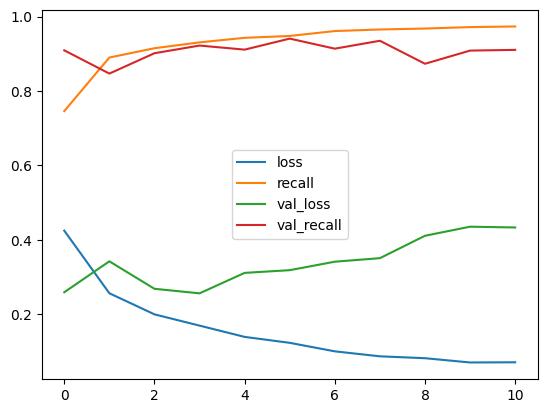

In [ ]:
model_loss.plot();

In [ ]:
loss, DL_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("DL Recall: ", DL_recall)

loss:  0.3100200295448303
DL Recall:  0.9345307350158691


In [ ]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

536/536 [==============================] - 13s 21ms/step
[[ 3112    58]
 [  357 13617]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3170
           1       1.00      0.97      0.98     13974

    accuracy                           0.98     17144
   macro avg       0.95      0.98      0.96     17144
weighted avg       0.98      0.98      0.98     17144



In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 1s 18ms/step
[[ 299   92]
 [ 113 1613]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       391
           1       0.95      0.93      0.94      1726

    accuracy                           0.90      2117
   macro avg       0.84      0.85      0.84      2117
weighted avg       0.91      0.90      0.90      2117



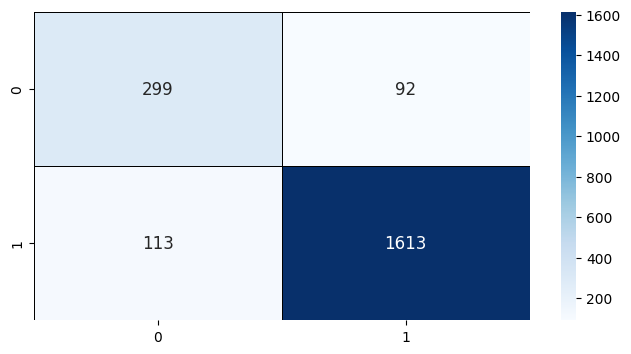

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 12},
)
plt.show()

67/67 [==============================] - 1s 19ms/step


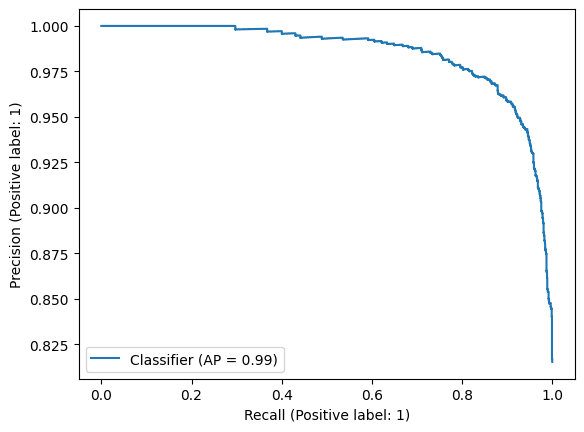

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.9850435790365857

In [ ]:
DL_pre = average_precision_score(y_test, y_pred_proba)
DL_rec = recall_score(y_test, y_pred)
DL_f1 = f1_score(y_test, y_pred)

## BERT Modeling

In [ ]:
# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

# With this code, 8 TPU cores are allocated.

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

### Read Data

In [ ]:
#in BERT model we do not need to the cleaned dataset because BertTokenizer will do the job and also
# BERT use the attention mechanism and it use the bidirectional processing, so it may get some info
# from the stopwords
df2 = temp.copy()
df2.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
#select wanted columns
df2 = df2[['Review Text', 'Recommended IND']]

In [ ]:
#rename the columns
df2.rename(columns={'Recommended IND': 'recommended', 'Review Text': "review"}, inplace=True)

In [ ]:
#delete duplications
df2.drop_duplicates(inplace = True)

In [ ]:
X2 = df2["review"].values
y2 = df2["recommended"].values

In [ ]:
X2

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

In [ ]:
X3 = df2["review"].tolist()

### Tokenization

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# We will always use the uncased model for classification and sentiment analysis problems.

#tokenizer.vocab

In [ ]:
print(len(tokenizer.vocab))

30522


### Fixing token counts of all documents

In [ ]:
number_tokens_sentences = []
for sent in X2:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True) #encode this input and give me the special tokens(`[CLS]` and `[SEP]`) as well
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

Max sentence length:  162


In [ ]:
np.array(number_tokens_sentences).mean()

76.31849962207104

In [ ]:
token_size = 150
sum(np.array(number_tokens_sentences) < token_size) / len(number_tokens_sentences)
# as long as it give me more than 95% then it is a good token size

0.9995275888133031

### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.1, stratify=y2, random_state=42)

### Transformation Vectors to Matrices

In [ ]:
def transformation(X2):
  # set array dimensions
  seq_len = 150

  tokens = tokenizer(list(X2),
                     max_length=seq_len,
                     truncation=True,
                     padding='max_length',
                     add_special_tokens=True)

  return np.array(tokens['input_ids']), np.array(tokens['attention_mask'])

In [ ]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [ ]:
Xids_train

array([[  101,  3565, 10140, ...,     0,     0,     0],
       [  101,  2122,  2853, ...,     0,     0,     0],
       [  101,  1045,  2031, ...,     0,     0,     0],
       ...,
       [  101,  1045,  2293, ...,     0,     0,     0],
       [  101,  1045,  2034, ...,     0,     0,     0],
       [  101,  1045,  1005, ...,     0,     0,     0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19051, 150)
Xmask_train.shape : (19051, 150)
Xids_test.shape   : (2117, 150)
Xmask_test.shape  : (2117, 150)


In [ ]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(150,), dtype=tf.int64, name=None), TensorSpec(shape=(150,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(150,), dtype=tf.int64, name=None), TensorSpec(shape=(150,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels


In [ ]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(150,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(150,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(150,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(150,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
#now we will start to build our model
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [ ]:
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [ ]:
len(X_train)

19051

In [ ]:
len(X_train)/32

595.34375

### Creating optimization

In [ ]:
from official.nlp import optimization
epochs = 3
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  #we can try different values to reach better results
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
print(len(train_ds))
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

596
1788
178


### Creating Model with TPU

In [ ]:
def create_model():

    model =TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(150,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(150,), name='attention_mask', dtype='int32')


    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = Dense(40, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x)
    y = Dense(1, activation="sigmoid", name='outputs')(x) # Returning the output


    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():

  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall]) #loss="binary_crossentropy", metrics=["Recall"])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 150)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 150)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 150, 7                                       

### Model Fiting

In [ ]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)
 #we used epochs=3, it's recommended because the model already knows english
 # if we specify more number of epochs, the model may tend to overfit

Epoch 1/3
596/596 [==============================] - 192s 194ms/step - loss: 0.5591 - recall: 0.7009 - val_loss: 0.3615 - val_recall: 0.9571
Epoch 2/3
596/596 [==============================] - 61s 102ms/step - loss: 0.4504 - recall: 0.7938 - val_loss: 0.3179 - val_recall: 0.9670
Epoch 3/3
596/596 [==============================] - 60s 101ms/step - loss: 0.4008 - recall: 0.8166 - val_loss: 0.3651 - val_recall: 0.9589


### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.559110,0.700882,0.361525,0.957126
1,0.450404,0.793805,0.317854,0.966976
2,0.400775,0.816601,0.365062,0.958864


<Axes: >

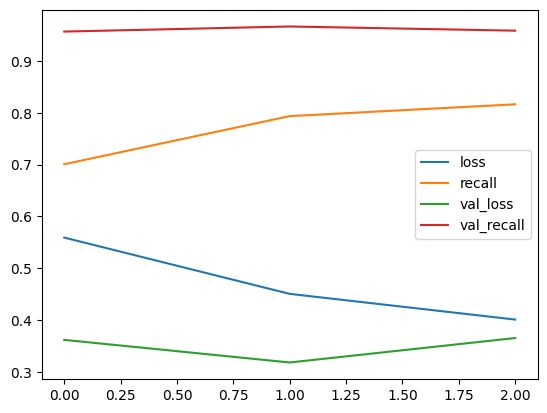

In [ ]:
model_loss.plot()

In [ ]:
y_pred = model3.predict(val_ds) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 6s 39ms/step
[[ 333   58]
 [  71 1655]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       391
           1       0.97      0.96      0.96      1726

    accuracy                           0.94      2117
   macro avg       0.90      0.91      0.90      2117
weighted avg       0.94      0.94      0.94      2117



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 23s 33ms/step
[[ 3346   176]
 [  266 15263]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3522
           1       0.99      0.98      0.99     15529

    accuracy                           0.98     19051
   macro avg       0.96      0.97      0.96     19051
weighted avg       0.98      0.98      0.98     19051



67/67 [==============================] - 3s 26ms/step


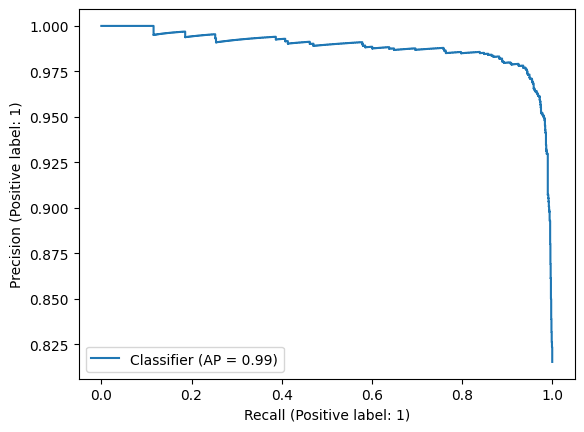

In [ ]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.9881442577138224

In [ ]:
BERT_pre = average_precision_score(y_test, y_pred_proba)
BERT_f1 = f1_score(y_test, y_pred)
BERT_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

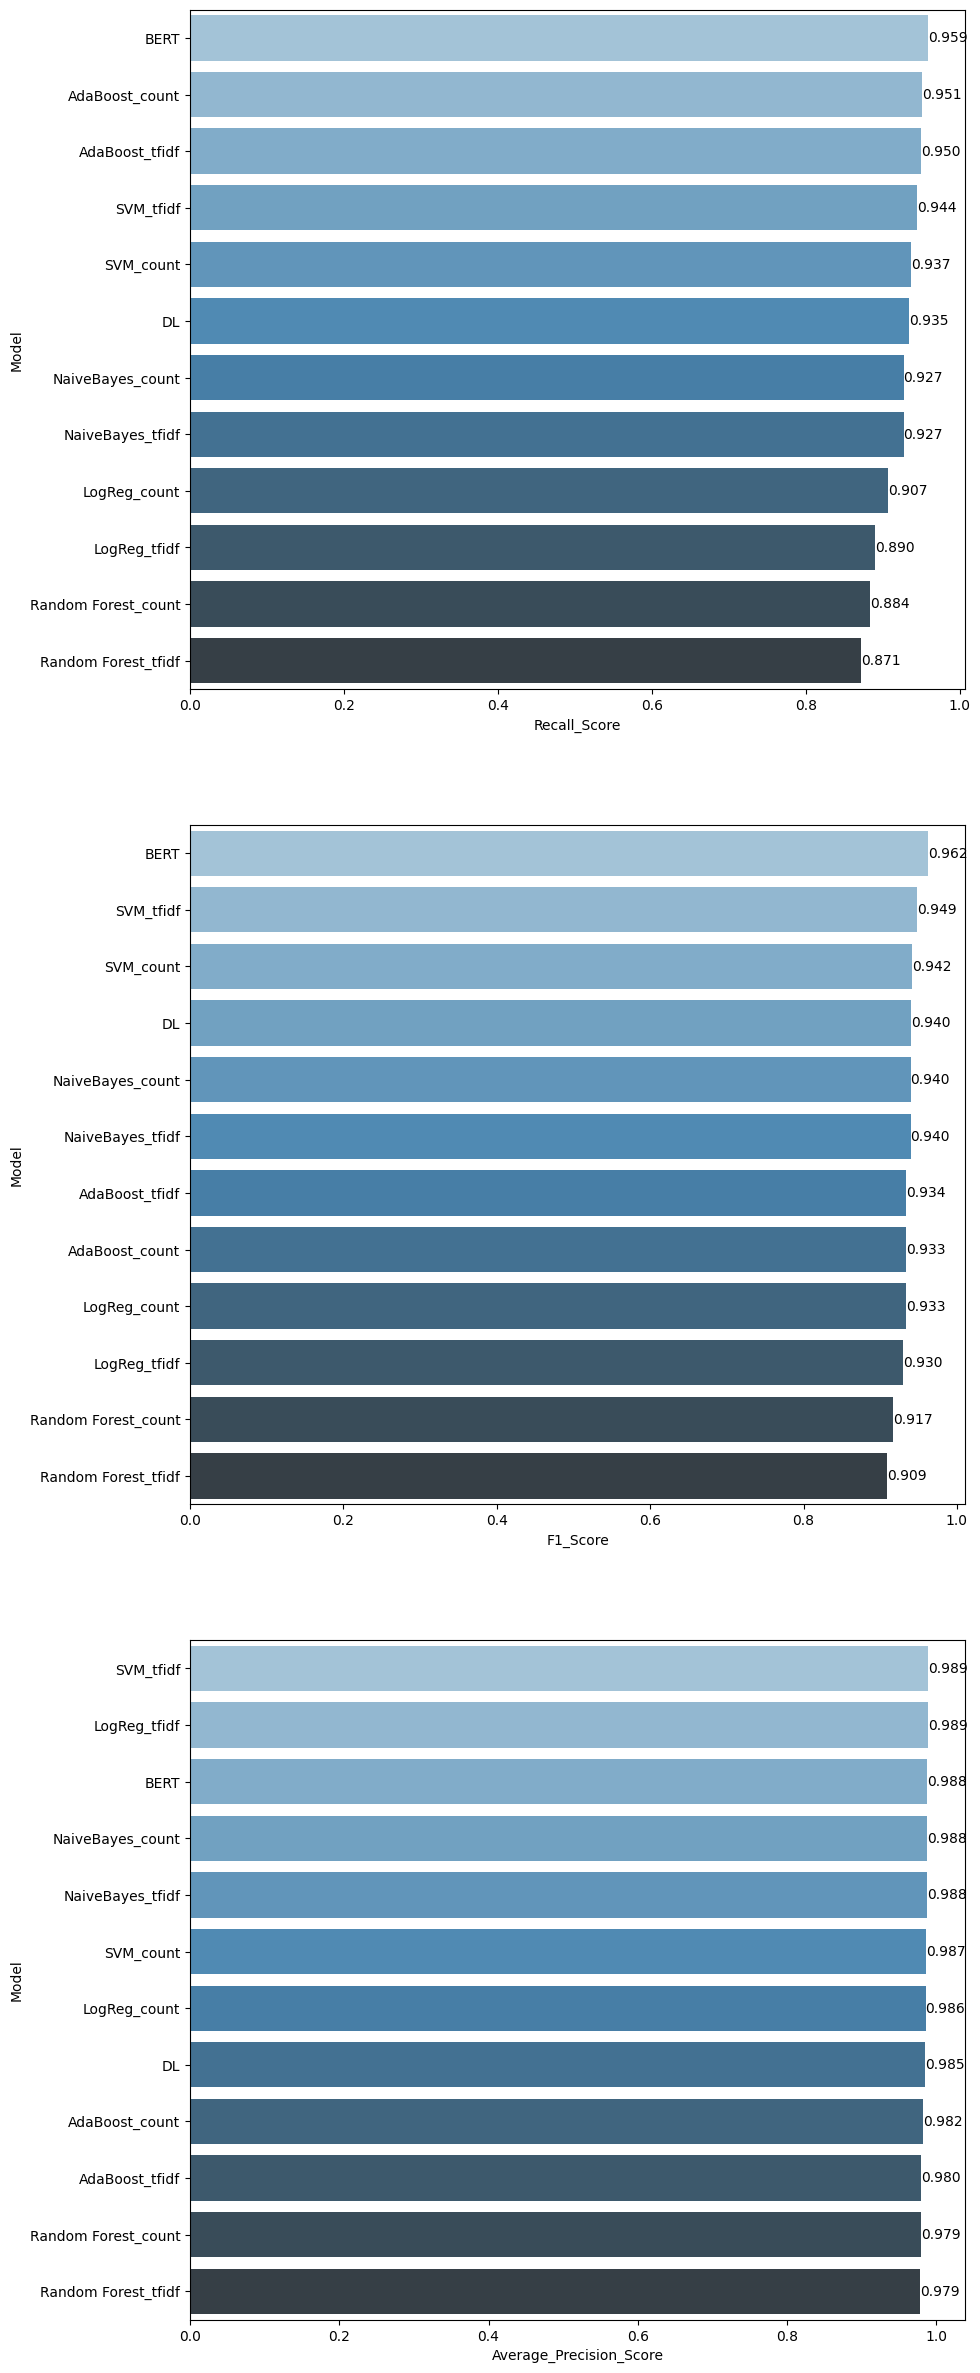

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count","AdaBoost_count",
                                  "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf","Random Forest_tfidf", "AdaBoost_tfidf",
                                  #"LogReg_gridsearch", "SVM_gridsearch","Random Forest_gridsearch",
                                  "DL", "BERT"],

                        "F1_Score": [nb_count_f1, log_count_f1, svm_count_f1, rf_count_f1, ada_count_f1,
                                     nb_tf_f1, log_tf_f1, svm_tf_f1, rf_tf_f1, ada_tf_f1,
                                     #log_gs_f1, svm_gs_f1, rf_gs_f1,
                                     DL_f1, BERT_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svm_count_rec, rf_count_rec, ada_count_rec,
                                         nb_tf_rec, log_tf_rec, svm_tf_rec, rf_tf_rec, ada_tf_rec,
                                         #log_gs_rec, svm_gs_rec, rf_gs_rec,
                                         DL_rec, BERT_rec],

                        "Average_Precision_Score": [nb_count_pre, log_count_per, svm_count_pre, rf_count_pre, ada_count_pre,
                                                    nb_tf_pre, log_tf_per, svm_tf_pre, rf_tf_pre, ada_tf_pre,
                                                    #log_gs_per, svm_gs_pre, rf_gs_pre,
                                                    DL_pre, BERT_pre]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

**in this problem we will focus on Recall as we want as the owner of a project to process as much bad reviews as we can so we can improve our products and gain more customers and increase the number of our loyal customers. Moreover, in the same time we want to have a good precision value**

from the model comparison chart, we can see that the BERT model acheive the best results amonge the others and it has very good results in the three metrices, therefore, it would be the best one to use

one of the reasons that BERT give us the best result is that it uses the attention mechanism and bidirectional training which give the BERT model the laverage over ML models(whose work better with less complex problems) and DL models(LSTM and GRU as they do not have that much capabilty of long memory along a long text or paragragh and they use unidirectional training)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___